<a href="https://colab.research.google.com/github/leenu10/Zomato-rating-prediction/blob/main/Team5_zomato_LeenuMathew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business analysis of banglore zomato by predicting restaurants rating

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"leenumathew97","key":"b887f98b6f0f49eb15d17848ab59f08a"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 700 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

zomato-bangalore-restaurants.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! ls

 files		    kaggle.json			       Zomato_predictions.csv
'kaggle (1).json'   sample_data
'kaggle (2).json'   zomato-bangalore-restaurants.zip


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("zomato-bangalore-restaurants.zip", "r")
zip_ref.extractall("files")
zip_ref.close()

#Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np

#Loading the dataset

In [ ]:
zomato=pd.read_csv("/content/files/zomato.csv")

In [ ]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
zomato.shape

(51717, 17)

#Feature Description

In [ ]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


> 'url' : listing url of restaurant on Zomato

> 'address': address of restaurant

> 'name' : name of the restaurant

> 'online_order' : yes/ no values

> 'book_table' : yes / no values

> 'rate' : overall rating for restaurant

> 'votes' : total ratings for restaurant

> 'phone' : phone number of restaurant

> 'location' : location of the neighbourhood region

> 'rest_type' : type of the restaurant

> 'dish_liked' : dish people liked for that restaurant

> 'cuisines' : food styles, separated by comma

> 'approx_cost(for two people)': cost for two people mentioned

> 'reviews_list' : list of tuple containing review for restaurant

> 'menu_item' : menu item list separated by comma

> 'listed_in(type)' : type of meal

> listed_in(city) : contains the neighbourhood city in which it is listed.




































# Droping irrelevant columns

In [ ]:
zomato.drop(['url','phone', 'dish_liked', 'menu_item', 'address','listed_in(city)'], axis=1, inplace=True)

#Removing Duplicates

In [ ]:
zomato.duplicated().sum()

12787

In [ ]:
zomato.drop_duplicates(inplace=True)
zomato.shape

(38930, 11)

# Dropping the missing values

In [ ]:
zomato.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           3850
votes                             0
location                         14
rest_type                       162
cuisines                         33
approx_cost(for two people)     253
reviews_list                      0
listed_in(type)                   0
dtype: int64

In [ ]:
zomato.dropna(how='any', inplace=True)
zomato.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
dtype: int64

In [ ]:
zomato.shape

(34759, 11)

#Renaming some of the columns for its easy use.

In [ ]:
zomato = zomato.rename(columns = {'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type', 'name':'restaurant', 'rate':'rating'})
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34759 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   restaurant    34759 non-null  object
 1   online_order  34759 non-null  object
 2   book_table    34759 non-null  object
 3   rating        34759 non-null  object
 4   votes         34759 non-null  int64 
 5   location      34759 non-null  object
 6   rest_type     34759 non-null  object
 7   cuisines      34759 non-null  object
 8   cost          34759 non-null  object
 9   reviews_list  34759 non-null  object
 10  type          34759 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.2+ MB


Since, 'rating' and 'cost' are of object type instead of float, there may be some incorrect elements present in these columns.

# Replacing the incorrect elements

In [ ]:
zomato['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [ ]:
zomato['cost'] = (zomato['cost'].str.replace(',', '')).astype('float64')


In [ ]:
zomato['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
zomato['rating'] = zomato['rating'].replace('NEW', np.nan)
zomato['rating'] = zomato['rating'].replace('-', np.nan)
zomato['rating'] = (zomato['rating'].str.rstrip('/5')).astype('float64')

In [ ]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34759 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurant    34759 non-null  object 
 1   online_order  34759 non-null  object 
 2   book_table    34759 non-null  object 
 3   rating        33272 non-null  float64
 4   votes         34759 non-null  int64  
 5   location      34759 non-null  object 
 6   rest_type     34759 non-null  object 
 7   cuisines      34759 non-null  object 
 8   cost          34759 non-null  float64
 9   reviews_list  34759 non-null  object 
 10  type          34759 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.2+ MB


In [ ]:
zomato = zomato.dropna(how='any')
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33272 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurant    33272 non-null  object 
 1   online_order  33272 non-null  object 
 2   book_table    33272 non-null  object 
 3   rating        33272 non-null  float64
 4   votes         33272 non-null  int64  
 5   location      33272 non-null  object 
 6   rest_type     33272 non-null  object 
 7   cuisines      33272 non-null  object 
 8   cost          33272 non-null  float64
 9   reviews_list  33272 non-null  object 
 10  type          33272 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.0+ MB


In [ ]:
zomato.shape

(33272, 11)

# Removing punctuations

In [ ]:
zomato[['reviews_list', 'cuisines']][:5]

,reviews_list,cuisines
0,"[('Rated 4.0', 'RATED\n A beautiful place to ...","North Indian, Mughlai, Chinese"
1,"[('Rated 4.0', 'RATED\n Had been here for din...","Chinese, North Indian, Thai"
2,"[('Rated 3.0', ""RATED\n Ambience is not that ...","Cafe, Mexican, Italian"
3,"[('Rated 4.0', ""RATED\n Great food and proper...","South Indian, North Indian"
4,"[('Rated 4.0', 'RATED\n Very good restaurant ...","North Indian, Rajasthani"


In [ ]:
def remove_punct(text):
  import string
  return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
zomato['reviews_list'] = zomato['reviews_list'].apply(lambda text: remove_punct(text))

In [ ]:
zomato[['reviews_list', 'cuisines']][:5]

,reviews_list,cuisines
0,Rated 40 RATEDn A beautiful place to dine inT...,"North Indian, Mughlai, Chinese"
1,Rated 40 RATEDn Had been here for dinner with...,"Chinese, North Indian, Thai"
2,Rated 30 RATEDn Ambience is not that good eno...,"Cafe, Mexican, Italian"
3,Rated 40 RATEDn Great food and proper Karnata...,"South Indian, North Indian"
4,Rated 40 RATEDn Very good restaurant in neigh...,"North Indian, Rajasthani"


# Removing stopwords

In [ ]:
def remove_stopwords(text):
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  sw_nltk = stopwords.words('english')
  sw_nltk.remove('not')
  words = [word for word in text.split() if word.lower() not in sw_nltk]
  new_text = " ".join(words)
  return(new_text)

In [ ]:
#zomato['reviews_list'] = zomato['reviews_list'].apply(lambda text: remove_stopwords(text))

In [ ]:
zomato['reviews_list']= zomato['reviews_list'].str.lower()

In [ ]:
zomato['reviews_list'].head()

0    rated 40 ratedn  a beautiful place to dine int...
1    rated 40 ratedn  had been here for dinner with...
2    rated 30 ratedn  ambience is not that good eno...
3    rated 40 ratedn  great food and proper karnata...
4    rated 40 ratedn  very good restaurant in neigh...
Name: reviews_list, dtype: object

#Removing URL

In [ ]:
import re
def remove_urls(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

#Feature Engineering

In [ ]:
zomato['rating_level'] = zomato['rating'].apply(lambda x: 'low' if x<3 else 'high' if x>4.5 else 'medium')

In [ ]:
zomato.head()

,restaurant,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,reviews_list,type,rating_level
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn a beautiful place to dine int...,Buffet,medium
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn had been here for dinner with...,Buffet,medium
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience is not that good eno...,Buffet,medium
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food and proper karnata...,Buffet,medium
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn very good restaurant in neigh...,Buffet,medium


# Outliers

In [ ]:
def outliers(x):
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outlier_values = x[(x<min_range) | (x>max_range)]
    return outlier_values

## Outliers of 'rating'.

In [ ]:
rating_outliers = outliers(zomato['rating'])
rating_outliers

206      2.0
265      2.0
587      2.0
1067     2.0
1532     2.4
        ... 
49415    2.1
49750    2.1
49919    2.3
49964    2.1
50054    2.3
Name: rating, Length: 189, dtype: float64

In [ ]:
rating_outliers.unique()

array([2. , 2.4, 2.2, 2.3, 2.1, 1.8])

Here all the outlier values are of low rating level.

## Outliers of 'cost'.

In [ ]:
cost_outliers = outliers(zomato['cost'])
cost_outliers

868      1600.0
1151     1600.0
1649     1700.0
2006     1600.0
2242     1600.0
          ...  
51695    1600.0
51696    1700.0
51697    1800.0
51707    2000.0
51715    2500.0
Name: cost, Length: 1525, dtype: float64

In [ ]:
cost_outliers.unique()

array([1600., 1700., 2200., 2000., 1800., 1900., 2500., 2100., 3000.,
       2800., 3400., 3500., 4000., 2400., 2600., 3200., 6000., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.])

The outliers of cost are particularly those above Rs.1500.

## Outliers of 'votes'.

In [ ]:
votes_outliers = outliers(zomato['votes'])
votes_outliers

2         918
7        2556
14        918
37       1647
38       4884
         ... 
51696    1776
51697    1313
51699    1218
51700    1003
51702    1094
Name: votes, Length: 4232, dtype: int64

In [ ]:
votes_outliers.unique()

array([ 918, 2556, 1647, ..., 4957, 2382,  843])

Here, both high and low variations can be observed in the outlier values.ie, the voting participation for some restaurants are as high as 4957 and as low as 843.

## Handling the Outliers.

As of now, since the proportion of outliers in the dataset is large, not going to drop it, instead trying to analyse the possible reasons through exploratory data analysis.

# Exploratory data analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

## Distribution of the numerical variables.

In [ ]:
nums = pd.DataFrame(zomato[['votes', 'cost', 'rating']])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

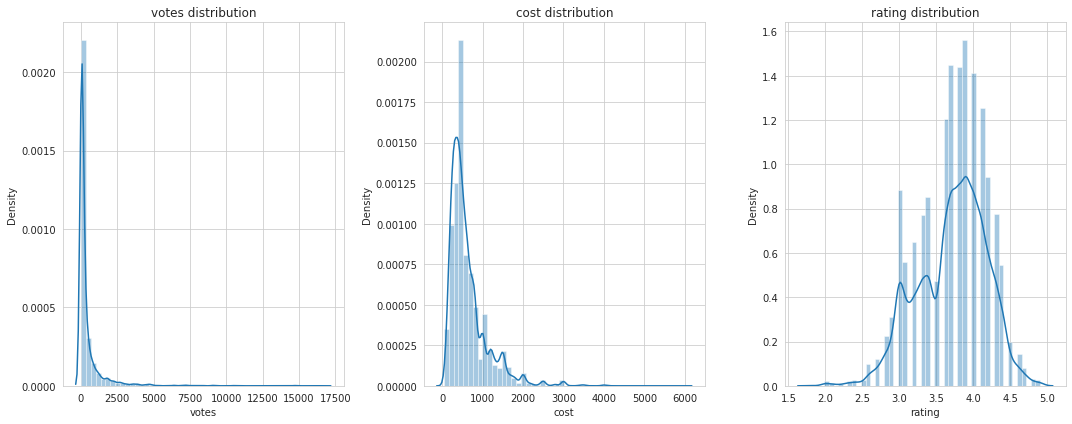

In [ ]:
plt.figure(figsize=(15,6))
i=0
for col in nums.columns:
  i+=1
  plt.subplot(1,3,i)
  sns.distplot(nums[col])
  plt.title(f'{col} distribution')
  plt.tight_layout()




> '**rating**' is somewhat normally distributed.

> '**votes**' and '**cost**' are highly negatively skewed.





In [ ]:
from sklearn.preprocessing import normalize

nums_array = normalize(nums)
nums = pd.DataFrame(nums_array, columns=nums.columns)
nums.head()

,votes,cost,rating
0,0.695791,0.718235,0.003681
1,0.701286,0.712870,0.003653
2,0.753894,0.656988,0.003121
3,0.281454,0.959502,0.011834
4,0.266645,0.963776,0.006104


In [ ]:
nums.shape

(33272, 3)

##Mean rating of the restaurants.

In [ ]:
zomato.restaurant.nunique()

6602

In [ ]:
mean_rating_df=zomato.groupby('restaurant')['rating'].mean().to_frame()
mean_rating_df.columns=['mean_rating']
mean_rating_df.head(10)

,mean_rating
restaurant,
#FeelTheROLL,3.400
#L-81 Cafe,3.900
#refuel,3.700
1000 B.C,3.200
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700
11 to 11 Express Biriyanis,3.000
1131 Bar + Kitchen,4.500
12th Main - Grand Mercure,4.100
1441 Pizzeria,4.100


## Top 20 restaurants on the basis of mean_rating. 

In [ ]:
zomato['restaurant'] = zomato['restaurant'].str.replace('SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine', 'Spa Cuisine' )

In [ ]:
top20_rest = zomato.groupby('restaurant')['rating'].mean().nlargest(20).to_frame()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


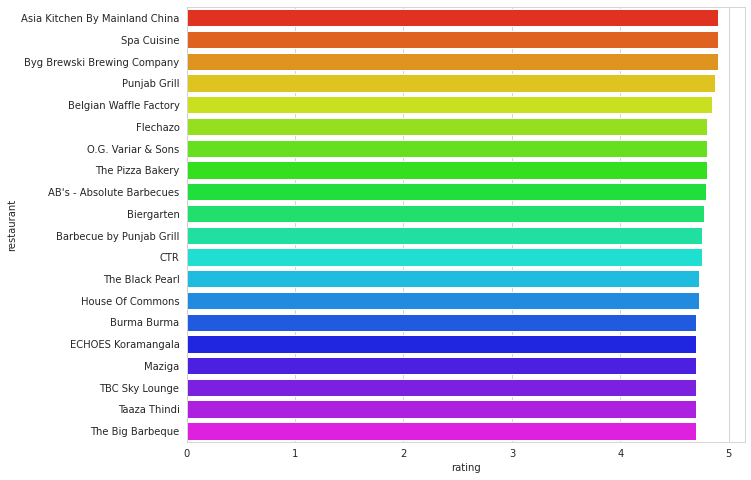

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(top20_rest['rating'], top20_rest.index, palette='gist_rainbow')

## Top Restaurant Chains In Bangalore With Most Number Of Outlets.

Text(0.5, 0, 'Number of outlets')

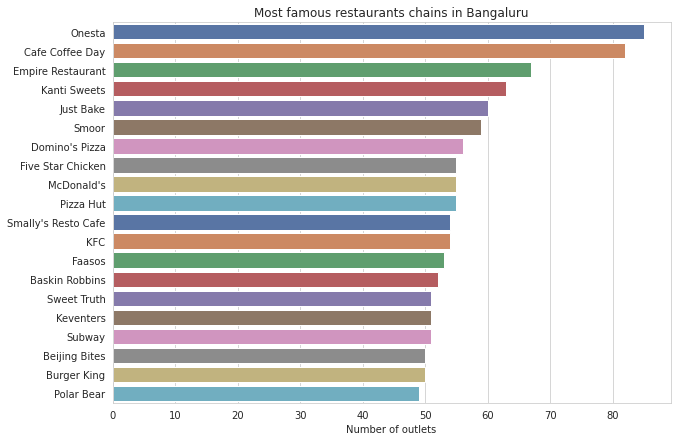

In [ ]:
plt.figure(figsize=(10,7))
chains=zomato['restaurant'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

### Insights:

*   **Onesta** and **Cafe Coffee Day** are the leading restaurant chains in Banglore with almost 80 outlets.




## Countplot of '**online_order**' and '**book_table**' in terms of '**rating**'.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


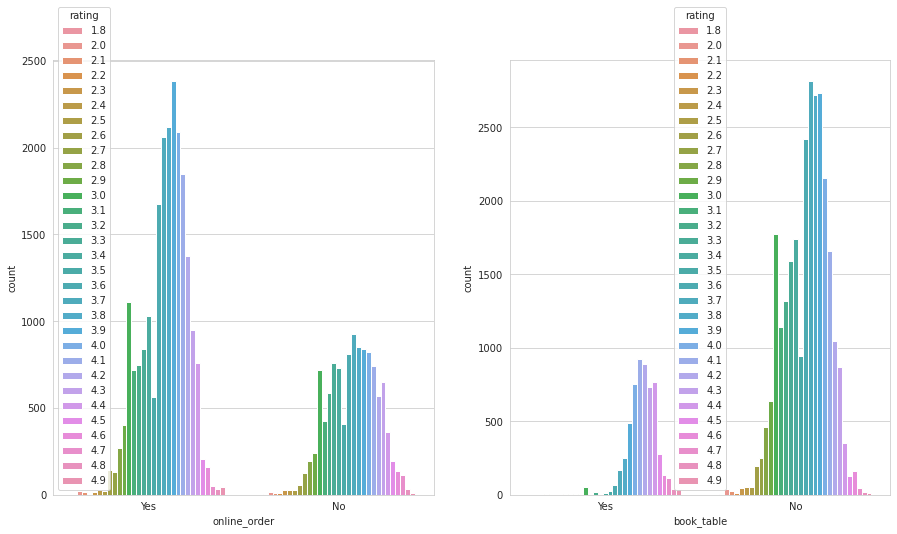

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
sns.countplot(zomato['online_order'], hue=zomato['rating'], ax=ax[0])
sns.countplot(zomato['book_table'], hue=zomato['rating'], ax=ax[1])
fig.show()

### Insights:



*   Most of the restaurants have the facility of online order, while booking the table facility is not there in majority of the restaurants.

*   The count of high rated restaurants is more in those with the facility of online order. But still some amount of low rating restaurants can be observed here.

*   Among the restaurants with no online order facility also, all type of  ratings can be seen.

*   In the case of book_table, it is interesting to note that eventhough majority of the restaurants do not have this facility, high ratings are dominant in those which have this facility. Only negligible count of low rating is observed in this section.







## Scatter plot of **rating** and **cost**.

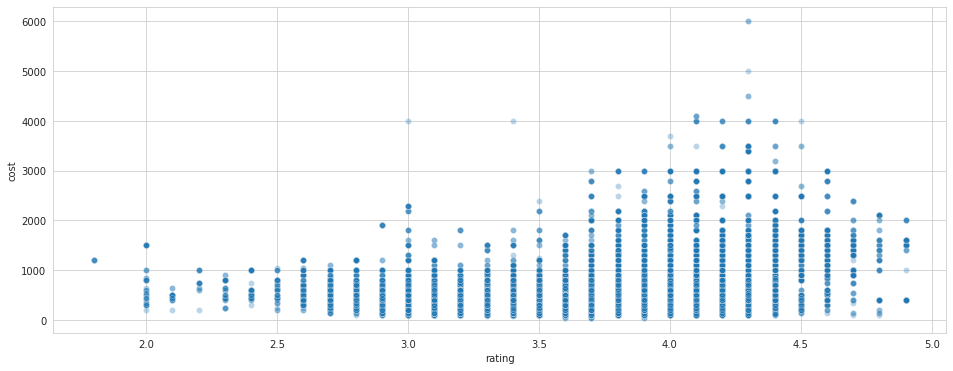

In [ ]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=zomato, x="rating", y="cost", alpha=0.3);

### Insights:

*  An upward trend of rating with cost an be observed, as those above a cost of Rs.2000 falls within the rating 3 to 5, while a majority of them are between 4 to 4.5 rating.

*   But the restaurants are more concentrated on cost below Rs.2000.



## Scatter plot of **cost** and **rating** in terms of **online_order**.

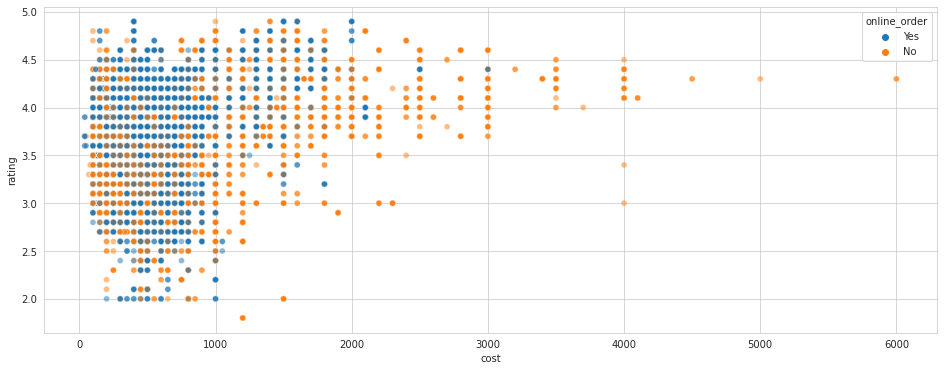

In [ ]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=zomato, x="cost", y="rating", hue='online_order', alpha=0.5)

### Insights:

*   Among restaurants falling within a cost of Rs.2000, majority have online order facility.

*   But almost all of the costly restaurants do not have the online order facility.







## Scatter plot of **cost** and **rating** in terms of **book_table**.

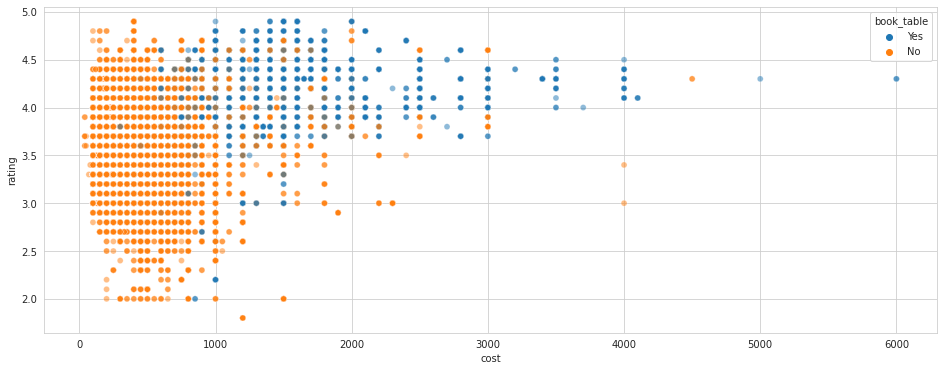

In [ ]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=zomato, x="cost", y="rating", hue='book_table', alpha=0.5)

### Insights:
Just opposite to what we have observed in case of online_order,

*   Among restaurants falling within a cost of Rs.2000, a vast majority do not have book_table facility.

*   But almost all of the costly restaurants have the book_table facility.




## Top 20 Restaurant types in Banglore.

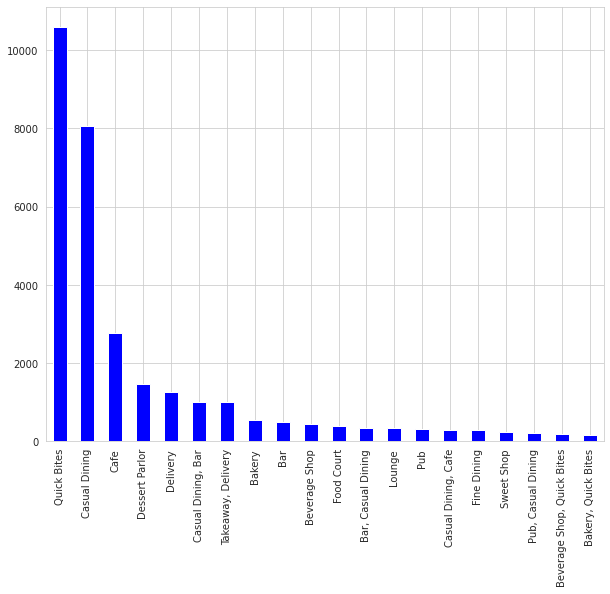

In [ ]:
plt.figure(figsize=(10,8))
zomato['rest_type'].value_counts().nlargest(20).plot.bar(color='blue')
plt.show()

### Insights:


*   **Quick Bites**, **Casual Dining** and **Cafe** type restaurants hold the major portion of the domain.




## Count plot of Rating level with type

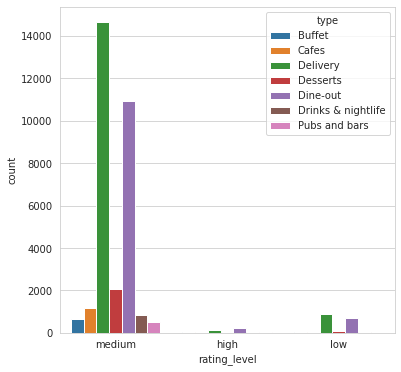

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='rating_level', hue='type', data=zomato)


### Insights:

*   Majority of the restaurants are of **Delivery** and **Dine-out** type.
*   High rating restaurants are dominated by **Delivery** and **Dine-out** type. 






## Main cuisines in the Restaurants of Banglore.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


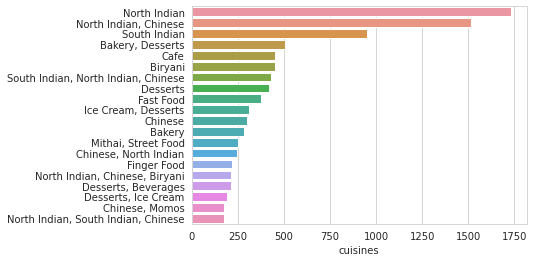

In [ ]:
cuisines = zomato['cuisines'].value_counts()[:20]
sns.barplot(cuisines, cuisines.index)

### Insights:

*   North Indian, Chinese and South Indian cuisines are dominant in the restaurants of Banglore.

*   Eventhough Banglore is a south indian place, South Indian dishes only stands 3rd among the cuisines. May be this is because of the high migratory population in Banglore, especially North Indians.



## No.of Restaurants Location wise. 

### Locations with highest no.of restaurants

In [ ]:
no_rest=zomato.groupby('location')['restaurant'].value_counts().to_frame()

In [ ]:
rest_no=no_rest.groupby('location')['restaurant'].sum().nlargest(10).to_frame()
rest_no

,restaurant
location,
BTM,2596
Koramangala 5th Block,1927
Indiranagar,1655
HSR,1645
Whitefield,1543
Marathahalli,1380
JP Nagar,1321
Jayanagar,1293
Bellandur,959


### Locations with lowest no.of restaurants.

In [ ]:
rest_least=no_rest.groupby('location')['restaurant'].sum().nsmallest(10).to_frame()
rest_least

,restaurant
location,
Nagarbhavi,1
Peenya,1
Rajarajeshwari Nagar,2
West Bangalore,3
Yelahanka,4
Central Bangalore,5
Kengeri,5
Hebbal,8
North Bangalore,8


### Insights:


*   While places like **BTM**, **Koramangala 5th Block**, **HSR** consists of 1000+ restaurants, places like **Nagarbhavi**, **Peenya** etc very much lacks in restaurants.




#Encoding

In [ ]:
zomato_en = zomato.drop(['reviews_list', 'rating_level'], axis=1)

In [ ]:
zomato_en.shape

(33272, 10)

In [ ]:
def encode(zomato_en):
  for col in zomato_en.columns[~zomato_en.columns.isin(['rating', 'cost',])]:
    zomato_en[col] = zomato_en[col].factorize()[0]
  return zomato_en

In [ ]:
encoded_zomato = encode(zomato_en.copy())
encoded_zomato.head()

,restaurant,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,type
0,0,0,0,4.1,0,0,0,0,800.0,0
1,1,0,1,4.1,1,0,0,1,800.0,0
2,2,0,1,3.8,2,0,1,2,800.0,0
3,3,1,1,3.7,3,0,2,3,300.0,0
4,4,1,1,3.8,4,1,0,4,600.0,0


In [ ]:
encoded_zomato.shape

(33272, 10)

#Correlation

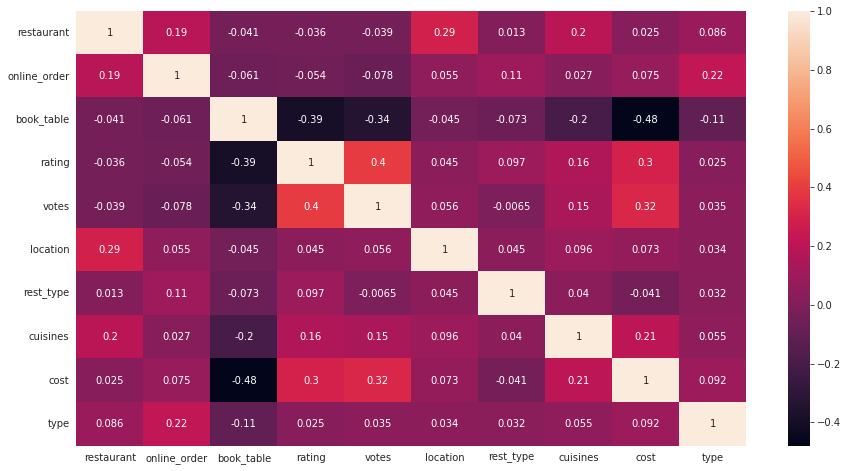

In [ ]:
corr = encoded_zomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

#Modelling

## Splitting the data into target and feature variables.

In [ ]:
x = encoded_zomato[["online_order","book_table","location","rest_type","cuisines","cost","votes","type"]]
y = encoded_zomato['rating']

##Splitting into train and test data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train.shape, y_train.shape

((26617, 8), (26617,))

##Decision tree.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,r2_score
 
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(min_samples_leaf=.00001)
tree.fit(x_train,y_train)
y_predict=tree.predict(x_test)
r2_score(y_test,y_predict)

0.6891838935126215

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfc=RandomForestRegressor(n_estimators=200,random_state=50,min_samples_leaf=.00001)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
r2_score(y_test,y_pred)

0.8079639326405266

## XG Boost Regression

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

[15:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8592024457549675

## Linear Regression.

In [ ]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.32698908090378187

##Extra Tree Classifier.

In [ ]:
from sklearn.ensemble import  ExtraTreesRegressor

ex_tree=ExtraTreesRegressor(n_estimators = 200)
ex_tree.fit(x_train,y_train)
y_predict=ex_tree.predict(x_test)
r2_score(y_test,y_predict)

0.7952597964086445

##Gradient Boosting Reression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_predict=gbr.predict(x_test)
r2_score(y_test,y_predict)

0.45521254691470314

## Selecting the best model based on its performance scores.

In [ ]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','Extra Tree Regressor', 'Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test), tree.score(x_test, y_test), rfc.score(x_test, y_test), ex_tree.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]
})

In [ ]:
models.sort_values(by='Score',ascending=False)

,Model,Score
5,XgBoost,0.859202
2,Random Forest,0.807964
3,Extra Tree Regressor,0.795260
1,Decision Tree,0.689184
4,Gradient Boost,0.474579
0,Linear Regression,0.326989


## Prediction.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Zomato_predictions.csv to Zomato_predictions (2).csv


In [ ]:
import io

rate_predict= pd.read_csv(io.BytesIO(uploaded['Zomato_predictions.csv']))


In [ ]:
rate_predict.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,type,city
0,Madras Meal Company,True,False,400,Banashankari,"Casual Dining, Takeaway, Delivery","South Indian, Chettinad",400,Buffet,Banashankari
1,Dwarkamai,True,False,291,Banashankari,Casual Dining,"South Indian, Chinese, Street Food",690,Buffet,Banashankari
2,Great Indian Khichdi,True,True,1279,J P Nagar,"Casual Dining, Delivery","North Indian, Healthy Food",420,Buffet,J P Nagar
3,Shiv Sagar Signature,False,False,705,J P Nagar,Casual Dining,"South Indian, Fast Food, Chinese",239,Buffet,J P Nagar
4,Vesuvio,False,True,200,Bannerghatta Road,Fine Dining,Italian,1000,Dine-out,Bannerghatta Road


In [ ]:
rate_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          10 non-null     object
 1   online_order  10 non-null     bool  
 2   book_table    10 non-null     bool  
 3   votes         10 non-null     int64 
 4   location      10 non-null     object
 5   rest_type     10 non-null     object
 6   cuisines      10 non-null     object
 7   cost          10 non-null     int64 
 8   type          10 non-null     object
 9   city          10 non-null     object
dtypes: bool(2), int64(2), object(6)
memory usage: 788.0+ bytes


##Converting cost to float.

In [ ]:
rate_predict['cost'] = rate_predict['cost'].astype(float)
rate_predict.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,type,city
0,Madras Meal Company,True,False,400,Banashankari,"Casual Dining, Takeaway, Delivery","South Indian, Chettinad",400.0,Buffet,Banashankari
1,Dwarkamai,True,False,291,Banashankari,Casual Dining,"South Indian, Chinese, Street Food",690.0,Buffet,Banashankari
2,Great Indian Khichdi,True,True,1279,J P Nagar,"Casual Dining, Delivery","North Indian, Healthy Food",420.0,Buffet,J P Nagar
3,Shiv Sagar Signature,False,False,705,J P Nagar,Casual Dining,"South Indian, Fast Food, Chinese",239.0,Buffet,J P Nagar
4,Vesuvio,False,True,200,Bannerghatta Road,Fine Dining,Italian,1000.0,Dine-out,Bannerghatta Road


In [ ]:
zomato_new = encode(rate_predict.copy())
zomato_new

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,type,city
0,0,0,0,0,0,0,0,400.0,0,0
1,1,0,0,1,0,1,1,690.0,0,0
2,2,0,1,2,1,2,2,420.0,0,1
3,3,1,0,3,1,1,3,239.0,0,1
4,4,1,1,4,2,3,4,1000.0,1,2
5,5,1,1,5,3,1,5,900.0,0,3
6,6,0,1,6,0,0,6,200.0,0,0
7,7,0,1,7,4,0,7,400.0,0,0
8,8,0,0,8,4,2,8,300.0,0,0
9,9,0,0,9,5,4,9,400.0,2,4


In [ ]:
x_pred = zomato_new[["online_order","book_table","location","rest_type","cuisines","cost","votes","type"]]
y_predict=xgb.predict(x_pred)
y_pred_list = [ round(elem, 1) for elem in y_predict ]
y_pred_list

[3.9, 3.9, 3.9, 3.8, 3.7, 3.7, 3.1, 3.9, 3.8, 4.1]

In [ ]:
rate_predict["rating"] = y_pred_list
rate_predict

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,type,city,rating
0,Madras Meal Company,True,False,400,Banashankari,"Casual Dining, Takeaway, Delivery","South Indian, Chettinad",400.0,Buffet,Banashankari,3.9
1,Dwarkamai,True,False,291,Banashankari,Casual Dining,"South Indian, Chinese, Street Food",690.0,Buffet,Banashankari,3.9
2,Great Indian Khichdi,True,True,1279,J P Nagar,"Casual Dining, Delivery","North Indian, Healthy Food",420.0,Buffet,J P Nagar,3.9
3,Shiv Sagar Signature,False,False,705,J P Nagar,Casual Dining,"South Indian, Fast Food, Chinese",239.0,Buffet,J P Nagar,3.8
4,Vesuvio,False,True,200,Bannerghatta Road,Fine Dining,Italian,1000.0,Dine-out,Bannerghatta Road,3.7
5,Lombard,False,True,35,Jayanagar,Casual Dining,"Italian, Spanish",900.0,Buffet,Jayanagar,3.7
6,Xi Jumping!,True,True,69,Banashankari,"Casual Dining, Takeaway, Delivery","Chinese, Fast Food",200.0,Buffet,Banashankari,3.1
7,Andhra Gunpowder,True,True,975,Indiranagar,"Casual Dining, Takeaway, Delivery",Andhra,400.0,Buffet,Banashankari,3.9
8,Punjabi Nawabi,True,False,99,Indiranagar,"Casual Dining, Delivery","North Indian, Mughlai, Biryani",300.0,Buffet,Banashankari,3.8
9,Lo! - Low Carb and Keto Foods,True,False,333,Domlur,"Takeaway, Delivery","Rolls, American, Healthy Food",400.0,Delivery,Indiranagar,4.1
